Stochastic Models
- Arithmetic Brownian Motion (ABM)
- Geometric Brownian Motion (GBM)
- Ornstein–Uhlenbeck Process
- Jump-diffusion model (merton)

In [3]:
#Arithmetic Brownian Motion (ABM) as a function
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate and plot ABM using Euler–Maruyama
def simulate_abm(mu=0.1, sigma=0.3, X0=100, T=1.0, N=1000, label=None):
    dt = T / N
    X = np.zeros(N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i + 1] = X[i] + mu * dt + sigma * dW

    time = np.linspace(0, T, N + 1)
    #plt.plot(time, X, label=label or f"μ={mu}, σ={sigma}")
    plt.plot(time, X)
    return X

array([100.        ,  99.99190899,  99.98568695, ...,  99.5279043 ,
        99.54565308,  99.54867349])

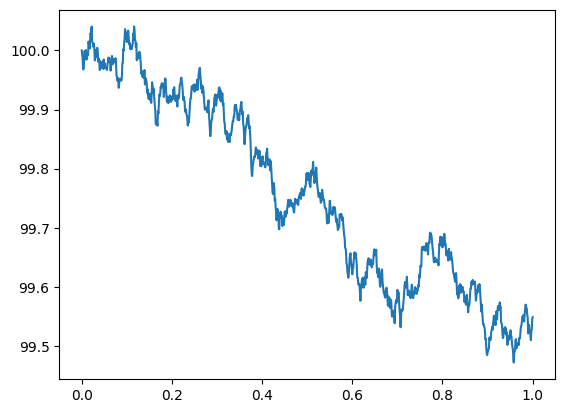

In [4]:
#Arithmetic Brownian Motion (ABM) - Try simulate 1 path
simulate_abm(mu=0.1, sigma=0.3, label="Path 1: μ=0.1, σ=0.3")

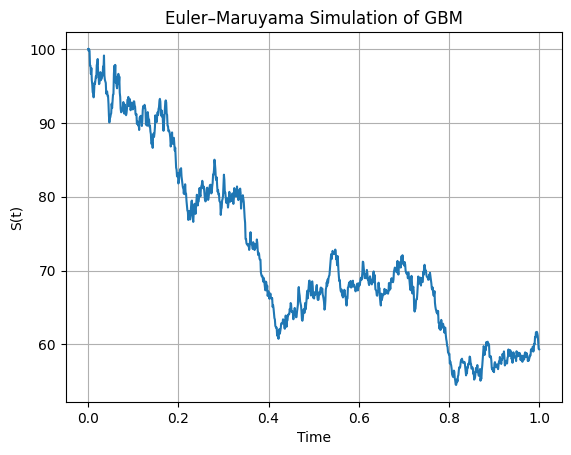

In [5]:
#Geometric Brownian Motion (GBM)
import numpy as np
import matplotlib.pyplot as plt

T = 1.0     # time horizon
N = 1000    # number of steps
dt = T / N
mu = 0.1
sigma = 0.3
S0 = 100

S = np.zeros(N+1)
S[0] = S0

for i in range(N):
    dW = np.random.normal(0, np.sqrt(dt))
    S[i+1] = S[i] + mu*S[i]*dt + sigma*S[i]*dW

plt.plot(np.linspace(0, T, N+1), S)
plt.title("Euler–Maruyama Simulation of GBM")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid()
plt.show()

In [7]:
#Geometric Brownian Motion (GBM) as a function
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate and plot GBM using Euler–Maruyama
def simulate_gbm(mu=0.1, sigma=0.3, S0=100, T=1.0, N=1000, label=None):
    dt = T / N
    S = np.zeros(N+1)
    S[0] = S0

    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        S[i+1] = S[i] + mu * S[i] * dt + sigma * S[i] * dW

    time = np.linspace(0, T, N+1)
    plt.plot(time, S, label=label or f"μ={mu}, σ={sigma}")

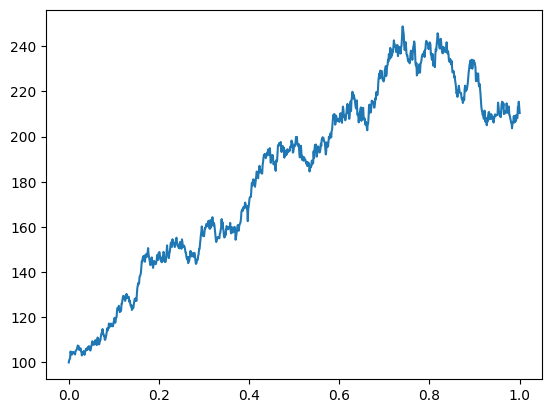

In [8]:
#Geometric Brownian Motion (GBM) - Try plot one path
simulate_gbm(mu=0.1, sigma=0.3, label="Path 1: μ=0.1, σ=0.3")

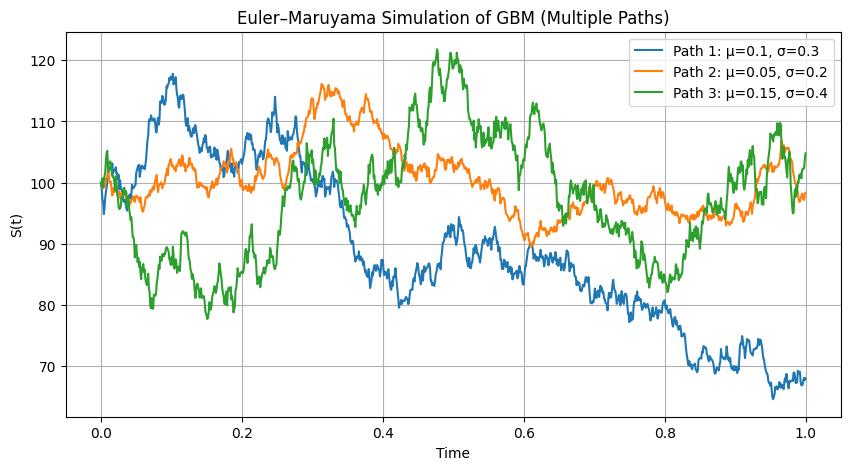

In [9]:
#Geometric Brownian Motion (GBM) - Plot multiple paths
# Initialize the plot
plt.figure(figsize=(10, 5))

# Simulate multiple paths
simulate_gbm(mu=0.1, sigma=0.3, label="Path 1: μ=0.1, σ=0.3")
simulate_gbm(mu=0.05, sigma=0.2, label="Path 2: μ=0.05, σ=0.2")
simulate_gbm(mu=0.15, sigma=0.4, label="Path 3: μ=0.15, σ=0.4")

# Finalize the plot
plt.title("Euler–Maruyama Simulation of GBM (Multiple Paths)")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ou(theta=1.0, mu=0.5, sigma=0.3, X0=0.0, T=1.0, N=1000, label=None):
    dt = T / N
    X = np.zeros(N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i + 1] = X[i] + theta * (mu - X[i]) * dt + sigma * dW

    time = np.linspace(0, T, N + 1)
    plt.plot(time, X, label=label or f"θ={theta}, μ={mu}, σ={sigma}")

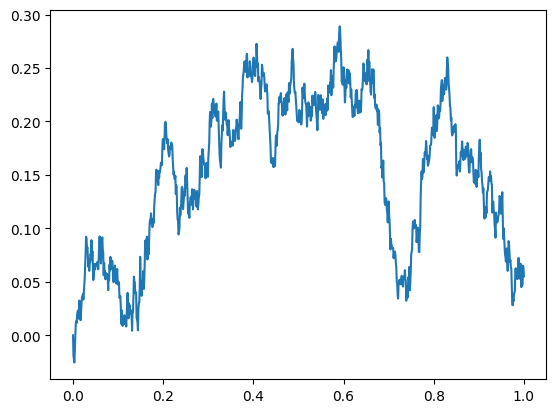

In [11]:
simulate_ou(theta=1.0, mu=0.5, sigma=0.3, label="Path 1: θ=1.0, μ=0.5, σ=0.3")

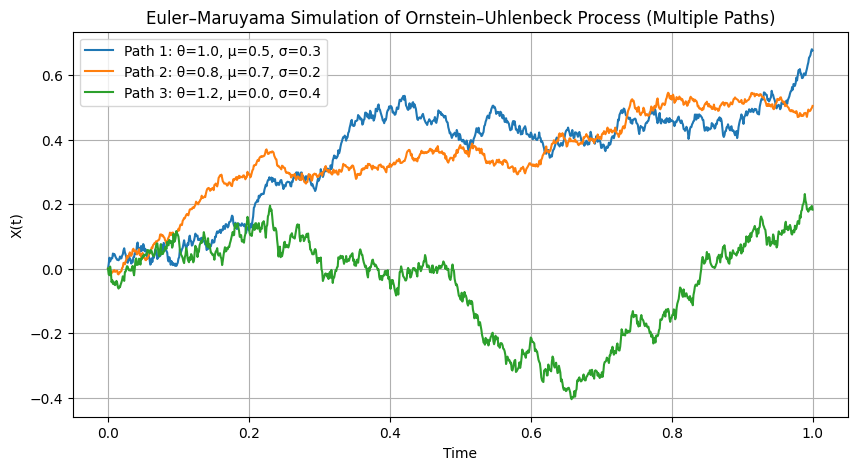

In [12]:
# Initialize the plot
plt.figure(figsize=(10, 5))

# Simulate multiple OU paths
simulate_ou(theta=1.0, mu=0.5, sigma=0.3, label="Path 1: θ=1.0, μ=0.5, σ=0.3")
simulate_ou(theta=0.8, mu=0.7, sigma=0.2, label="Path 2: θ=0.8, μ=0.7, σ=0.2")
simulate_ou(theta=1.2, mu=0.0, sigma=0.4, label="Path 3: θ=1.2, μ=0.0, σ=0.4")

# Finalize the plot
plt.title("Euler–Maruyama Simulation of Ornstein–Uhlenbeck Process (Multiple Paths)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

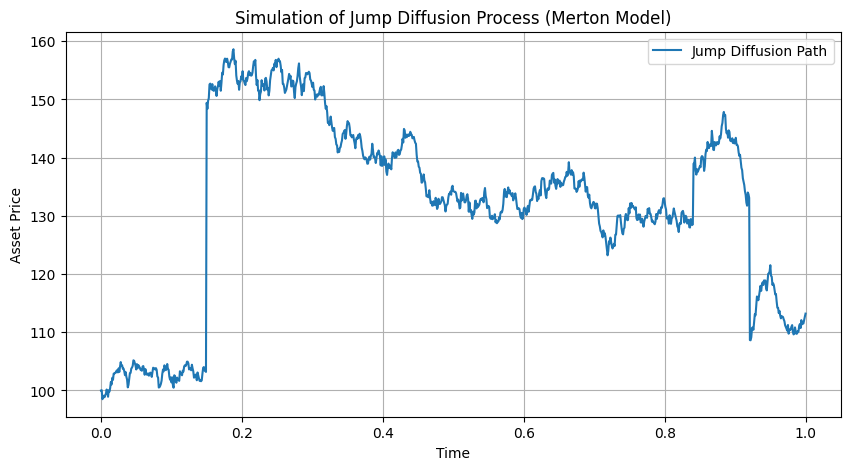

In [14]:
#Jump-diffusion model (merton)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0       # Time horizon (years)
N = 1000     # Number of time steps
dt = T / N
mu = 0.05      # Drift
sigma = 0.2   # Volatility
S0 = 100      # Initial price
lamb = 2    # Jump intensity (λ)
mu_j = 0   # Mean of jump size (log-normal)
sigma_j = 0.2 # Std of jump size

# Arrays
t = np.linspace(0, T, N+1)
S = np.zeros(N+1)
S[0] = S0

for i in range(1, N+1):
    dW = np.random.normal(0, np.sqrt(dt))
    dN = np.random.poisson(lamb * dt)  # Jump count (0 or 1 most of the time)
    J = np.random.normal(mu_j, sigma_j) if dN > 0 else 0
    J = J*(2*np.random.binomial(1,0.5)-1)
    S[i] = S[i-1] * (1 + mu * dt + sigma * dW + J)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, S, label="Jump Diffusion Path")
plt.title("Simulation of Jump Diffusion Process (Merton Model)")
plt.xlabel("Time")
plt.ylabel("Asset Price")
plt.grid(True)
plt.legend()
plt.show()